<a href="https://colab.research.google.com/github/supragyabajpai/DeepLearning_Repository/blob/master/DogsVsCats_Prediction(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Network**

In [0]:
#Step1:- mounted my google drive on colab
import os
os.chdir('/content/drive/My Drive/datasets/dataset')  #change dir


In [0]:
training_data_dir ="/content/drive/My Drive/datasets/dataset/training/training_set"#path to training_set
test_data_dir ="/content/drive/My Drive/datasets/dataset/testing/test_set"#path to testin_set

In [0]:
#to count the number of images in the particular folder
import os.path
path = '/content/drive/My Drive/datasets/dataset/training/training_set/dogs'
num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
print(num_files)

4000


In [0]:
import os.path
path = '/content/drive/My Drive/datasets/dataset/training/training_set/cats'
num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
print(num_files)

4000


In [0]:
import os.path
path = '/content/drive/My Drive/datasets/dataset/testing/test_set/dogs'
num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
print(num_files)

1000


In [0]:
import os.path
path = '/content/drive/My Drive/datasets/dataset/testing/test_set/cats'
num_files = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))])
print(num_files)
#the total number of images we have in our training set is 8000 and testing set is 4000

1000


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_rows
pd.options.display.max_columns
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 5
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='sigmoid')(x)

classifier = Model(pre_trained_model.input, x)

classifier.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

classifier.summary()

58892288/58889256 [==============================] - 5s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

In [0]:
#took the below data from keras image preprocessing
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
       rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [0]:
training_set =train_datagen.flow_from_directory(
        training_data_dir,
        target_size=(224,224),batch_size=16)

Found 8000 images belonging to 2 classes.


In [0]:
validation_generator =test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224,224),batch_size=16
        )

Found 2000 images belonging to 2 classes.


In [0]:
history = classifier.fit_generator(
    training_set,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=2000//16,
    steps_per_epoch=8000//16)

Epoch 1/5
500/500 [==============================] - 7268s 15s/step - loss: 0.5679 - accuracy: 0.6946 - val_loss: 0.2204 - val_accuracy: 0.8900
Epoch 2/5
500/500 [==============================] - 5994s 12s/step - loss: 0.2639 - accuracy: 0.8855 - val_loss: 0.0931 - val_accuracy: 0.9243
Epoch 3/5
500/500 [==============================] - 5982s 12s/step - loss: 0.1969 - accuracy: 0.9171 - val_loss: 0.1011 - val_accuracy: 0.9340
Epoch 4/5
500/500 [==============================] - 5960s 12s/step - loss: 0.1635 - accuracy: 0.9301 - val_loss: 0.1106 - val_accuracy: 0.9455
Epoch 5/5
500/500 [==============================] - 5992s 12s/step - loss: 0.1483 - accuracy: 0.9397 - val_loss: 0.2647 - val_accuracy: 0.9507


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


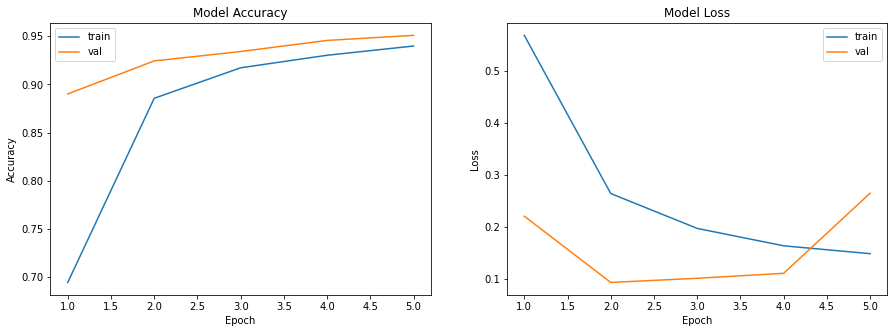

In [0]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)